This assignment is inspired by: 

- https://www.kaggle.com/code/carlmcbrideellis/an-introduction-to-xgboost-regression
- https://www.kaggle.com/code/dansbecker/xgboost/notebook

In this assignment we will apply XGBoost Regression techniques to predict house prices, based on the famous Kaggle Dataset https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

Step 1 is to download the dataset.

In [1]:
#=========================================================================
# load up the libraries
#=========================================================================
import pandas  as pd
import numpy   as np
import xgboost as xgb

#=========================================================================
# read in the data
#=========================================================================
train_data = pd.read_csv('train.csv',index_col=0)
test_data  = pd.read_csv('test.csv',index_col=0)

In [2]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [4]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### <center style="background-color:Gainsboro; width:60%;">Feature selection</center>
The purpose of feature selection, as the name suggests, is to only model the most pertinent and important features, thus reducing the computational overhead, and also to alleviate the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). The following are a number of notebooks covering techniques to achieve said goal, all of which use the House Prices data as an example:

* [Feature selection using the Boruta-SHAP package](https://www.kaggle.com/carlmcbrideellis/feature-selection-using-the-boruta-shap-package)
* [Recursive Feature Elimination (RFE) example](https://www.kaggle.com/carlmcbrideellis/recursive-feature-elimination-rfe-example)
* [House Prices: Permutation Importance example](https://www.kaggle.com/carlmcbrideellis/house-prices-permutation-importance-example)
* [Feature importance using the LASSO](https://www.kaggle.com/carlmcbrideellis/feature-importance-using-the-lasso)

In this assignment, we shall use all of the numerical columns, and ignore the categorical features. To encode the categorical features one can use for example [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). 

Our first task is to do Feature Exploration and Selection. 

In [5]:
## Do your work here
# Assuming df is your DataFrame containing the house data
# List of columns to keep based on the previous discussion
# columns_to_keep = [
#     'OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF',
#     'GarageArea', 'LotArea', 'Neighborhood', 'YearBuilt', 'YearRemodAdd',
#     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'GarageCars',
#     'GarageType', 'ExterQual', 'Foundation', 'Fireplaces', 'FireplaceQu',
#     'PavedDrive', 'SalePrice','BsmtFullBath','BsmtHalfBath'
# ]

important_features = ['GarageCars', 'KitchenQual', 'HalfBath', 'ExterQual', 'YearBuilt', 'OverallCond', 'Neighborhood', 'Foundation', 'OverallQual', '1stFlrSF', 'TotalBsmtSF','SalePrice']

# Drop columns that are not in the columns_to_keep list
# df_filtered = train_data[columns_to_keep]
df_filtered = train_data[important_features]


# Display the first few rows of the filtered DataFrame
print(df_filtered.head())

    GarageCars KitchenQual  HalfBath ExterQual  YearBuilt  OverallCond  \
Id                                                                       
1            2          Gd         1        Gd       2003            5   
2            2          TA         0        TA       1976            8   
3            2          Gd         1        Gd       2001            5   
4            3          Gd         0        TA       1915            5   
5            3          Gd         1        Gd       2000            5   

   Neighborhood Foundation  OverallQual  1stFlrSF  TotalBsmtSF  SalePrice  
Id                                                                         
1       CollgCr      PConc            7       856          856     208500  
2       Veenker     CBlock            6      1262         1262     181500  
3       CollgCr      PConc            7       920          920     223500  
4       Crawfor     BrkTil            7       961          756     140000  
5       NoRidge      PCon

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_filtered.drop(columns=['SalePrice']), df_filtered['SalePrice'], test_size=0.2, random_state=42)


### <center style="background-color:Gainsboro; width:60%;">Feature engineering</center>
As mentioned, one aspect of feature engineering is the creation of new features out of existing features. A simple example would be to create a new feature which is the sum of the number of bathrooms in the house:

In [7]:
# for df in (X_train, X_test):
#     df["n_bathrooms"] = df["BsmtFullBath"] + (df["BsmtHalfBath"]*0.5) + df["FullBath"] + (df["HalfBath"]*0.5)
#     # df["area_with_basement"]  = df["GrLivArea"] + df["TotalBsmtSF"]

Your next task is to apply some feature engineering to prepare for using the XGBoost Estimator to predict house prices.

In [8]:
#code goes here
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 255 to 1127
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageCars    1168 non-null   int64 
 1   KitchenQual   1168 non-null   object
 2   HalfBath      1168 non-null   int64 
 3   ExterQual     1168 non-null   object
 4   YearBuilt     1168 non-null   int64 
 5   OverallCond   1168 non-null   int64 
 6   Neighborhood  1168 non-null   object
 7   Foundation    1168 non-null   object
 8   OverallQual   1168 non-null   int64 
 9   1stFlrSF      1168 non-null   int64 
 10  TotalBsmtSF   1168 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 109.5+ KB


In [9]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns
col_transformer = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_features),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])





For more on this fascinating aspect may I recommend the free on-line book ["*Feature Engineering and Selection: A Practical Approach for Predictive Models*"](http://www.feat.engineering/) by Max Kuhn and Kjell Johnson.
### <center style="background-color:Gainsboro; width:60%;">XGBoost estimator</center>
Note that for this competition we use the RMSLE evaluation metric, rather than the default metric, which for regression is the RMSE. For more on the peculiarities of the RMSLE see the Appendix below.

In [10]:
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
pipe = Pipeline([('col_transformer', col_transformer), ('regressor', xgb.XGBRegressor(eval_metric='rmsle'))])

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {
    'regressor__max_depth': [4, 5],
    'regressor__n_estimators': [500, 600, 700],
    'regressor__learning_rate': [0.01, 0.1,0.2]
}

Can you use grid search to find the optimal hyper parameters?

In [11]:
## put code here
search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_log_error', n_jobs=-1)
search.fit(X_train, y_train)
best_model = search.best_estimator_


In [12]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'regressor__learning_rate': 0.01, 'regressor__max_depth': 4, 'regressor__n_estimators': 700}


Now, can you setup a XGBoost Regressor object using your hyperparameters and fit it?

In [13]:
# put code here

Finally, can you run it on your test set?

In [14]:
# put code here
from sklearn.metrics import mean_squared_error,mean_squared_log_error,r2_score,mean_absolute_error


predictions = best_model.predict(X_test)
print('train_score',best_model.score(X_train,y_train))
print('MSE',mean_squared_error(y_test,predictions))
print('MAE',mean_absolute_error(y_test,predictions))
print('R2',r2_score(y_test,predictions))

train_score 0.920437216758728
MSE 949572361.4635708
MAE 19788.67508561644
R2 0.8762018084526062


In [15]:
print(best_model)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  Index(['GarageCars', 'HalfBath', 'YearBuilt', 'OverallCond', 'OverallQual',
       '1stFlrSF', 'TotalBsmtSF'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['KitchenQual', 'ExterQual', 'Neighborhood', 'Foundation'], dtype='object'))])),
                ('r...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                            

Can you score your solution offline and see how it does?

In [16]:
# read in the ground truth file
columns_to_keep = [
    'OverallQual', 'OverallCond', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF',
    'GarageArea', 'LotArea', 'Neighborhood', 'YearBuilt', 'YearRemodAdd',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'GarageCars',
    'GarageType', 'ExterQual', 'Foundation', 'Fireplaces', 'FireplaceQu',
    'PavedDrive', 'BsmtFullBath','BsmtHalfBath'
]

df_test = test_data[columns_to_keep]
solution   = pd.read_csv('sample_submission.csv')
y_true     = solution["SalePrice"]
df_test["n_bathrooms"] = df_test["BsmtFullBath"] + (df_test["BsmtHalfBath"]*0.5) + df_test["FullBath"] + (df_test["HalfBath"]*0.5)
df_test["area_with_basement"]  = df_test["GrLivArea"] + df_test["TotalBsmtSF"]
predictions = best_model.predict(df_test)
RMSLE = np.sqrt( mean_squared_log_error(y_true, predictions) )
print("The score is %.5f" % RMSLE )
print('MAE',mean_absolute_error(y_true,predictions))  
print('R2',r2_score(y_true,predictions))       

The score is 0.36760
MAE 54124.8609766003
R2 -17.484996874341654


/var/folders/n9/j0dtm7bn7_56lrscncyljw6m0000gn/T/ipykernel_78785/4042217332.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["n_bathrooms"] = df_test["BsmtFullBath"] + (df_test["BsmtHalfBath"]*0.5) + df_test["FullBath"] + (df_test["HalfBath"]*0.5)
/var/folders/n9/j0dtm7bn7_56lrscncyljw6m0000gn/T/ipykernel_78785/4042217332.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["area_with_basement"]  = df_test["GrLivArea"] + df_test["TotalBsmtSF"]


In [17]:
y_train.shape



(1168,)

Finally, use the below block to prepare your submission

In [18]:
pd.DataFrame({'Id':test_data.index,'SalePrice':predictions}).to_csv('submission.csv',index=False)



### <center style="background-color:Gainsboro; width:60%;">Feature importance</center>
Let us also take a very quick look at the feature importance too:

['YearRemodAdd', 'HalfBath', 'BsmtHalfBath', 'BsmtFullBath', 'FireplaceQu', 'OverallQual', 'OverallCond', 'TotalBsmtSF', '1stFlrSF', 'LotArea', 'GarageArea']


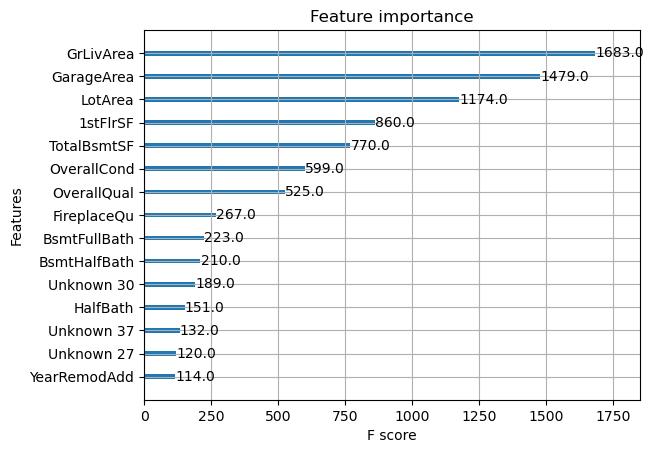

In [19]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
best_model = search.best_estimator_.named_steps['regressor']

# 假设 best_model 是你的 XGBoost 模型
ax = plot_importance(best_model, max_num_features=15)

# 获取特征名称
feature_names = df_test.columns

# 手动设置 x 轴标签，添加安全检查
yticklabels = ax.get_yticklabels()
mapped_labels = []
important_features = []
for i in yticklabels:
    index = int(i.get_text()[1:])
    if index < len(feature_names):
        mapped_labels.append(feature_names[index])
        important_features.append(feature_names[index])
    else:
        mapped_labels.append(f"Unknown {index}")

ax.set_yticklabels(mapped_labels)
important_features = important_features[:11]
print(important_features)

Where here the `F score` is a measure "*...based on the number of times a variable is selected for splitting, weighted by the squared improvement to the model as a result of each split, and averaged over all trees*." [1] 

Note that these importances are susceptible to small changes in the training data, and it is much better to make use of ["GPU accelerated SHAP values"](https://www.kaggle.com/carlmcbrideellis/gpu-accelerated-shap-values-jane-street-example), incorporated with version 1.3 of XGBoost.

Can you follow the above guide use SHAP values instead of F Score?

In [20]:
# code here

### <center style="background-color:Gainsboro; width:60%;">Appendix: The RMSLE evaluation metric</center>
From the competition [evaluation page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) we see that the metric we are using is the root mean squared logarithmic error (RMSLE), which is given by

$$ {\mathrm {RMSLE}}\,(y, \hat y) = \sqrt{ \frac{1}{n} \sum_{i=1}^n \left(\log (1 + \hat{y}_i) - \log (1 + y_i)\right)^2} $$

where $\hat{y}_i$ is the predicted value of the target for instance $i$, and $y_i$
is the actual value of the target for instance $i$.

It is important to note that, unlike the RMSE, the RMSLE is asymmetric; penalizing much more the underestimated predictions than the overestimated predictions. For example, say the correct value is $y_i = 1000$, then underestimating by 600 is almost twice as bad as overestimating by 600:

In [21]:
def RSLE(y_hat,y):
    return np.sqrt((np.log1p(y_hat) - np.log1p(y))**2)

print("The RMSLE score is %.3f" % RSLE( 400,1000) )
print("The RMSLE score is %.3f" % RSLE(1600,1000) )

The RMSLE score is 0.915
The RMSLE score is 0.470


The asymmetry arises because 

$$ \log (1 + \hat{y}_i) - \log (1 + y_i) =  \log \left( \frac{1 + \hat{y}_i}{1 + y_i} \right) $$

so we are essentially looking at ratios, rather than differences such as is the case of the RMSE. We can see the form that this asymmetry takes in the following plot, again using 1000 as our ground truth value:

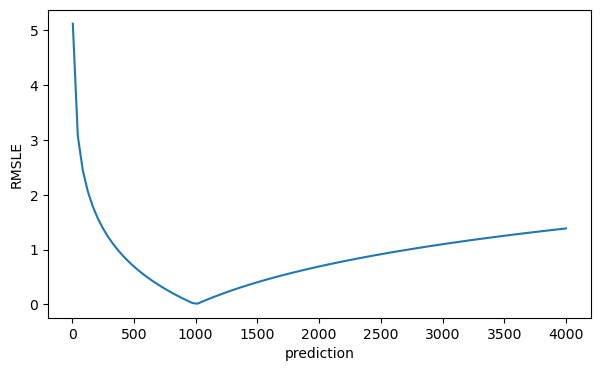

In [22]:
plt.rcParams["figure.figsize"] = (7, 4)
x = np.linspace(5,4000,100)
plt.plot(x, RSLE(x,1000))
plt.xlabel('prediction')
plt.ylabel('RMSLE')
plt.show()